In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_folder = "../../../data/"

In [3]:
danmu_data = pd.read_csv("../../../data/activeuser_submit_danmu_sound_with_drama_202211_202303.csv")

In [4]:
danmu_data['date'] = pd.to_datetime(danmu_data['danmu_info_date']).dt.date

In [5]:
danmu_data = danmu_data[danmu_data["user_in_drama_sound_pay_type"] == 2]

In [6]:
print({danmu_data.shape}, {danmu_data["drama_id"].nunique()})

{(1247307, 11)} {499}


In [7]:
DL_dataset = pd.read_csv("../../../data/0101_0131_all_feature.csv")

In [8]:
DL_dataset.head()

,user_id,sound_id_id,drama_id,user_name_len,user_name_has_chinese,user_name_has_english,user_intro_len,user_intro_has_chinese,user_intro_has_english,user_icon_is_default,...,k_3_15s_sim,k_2_8s_sim_q_1_num,k_2_8s_sim_q_2_num,k_2_8s_sim_q_3_num,k_2_15s_sim_q_1_num,k_2_15s_sim_q_2_num,k_2_15s_sim_q_3_num,user_in_drama_is_pay_for_drama_in_next_time,pay_FS,pay_DL
0,12304,7017722,52265,18,0,0,NaN,0,0,0,...,0.913019,0.283098,0.468008,0.652918,0.279280,0.461234,0.461234,2,2,2
1,24488,6976696,59699,25,0,0,60.0,1,0,0,...,0.835461,0.252245,0.417907,0.583569,0.254123,0.420560,0.420560,2,2,2
2,24488,6991707,59328,25,0,0,60.0,1,0,0,...,0.826704,0.248742,0.412480,0.576218,0.252045,0.416657,0.416657,2,2,2
3,24488,7018734,59699,25,0,0,60.0,1,0,0,...,0.743361,0.171188,0.284708,0.398228,0.208059,0.345994,0.345994,2,2,2
4,24488,7059430,60282,25,0,0,60.0,1,0,0,...,0.878291,0.258000,0.429238,0.600477,0.261848,0.435509,0.435509,2,2,2


In [9]:
drama_uniq = DL_dataset["drama_id"].nunique()
user_uniq = DL_dataset["user_id"].nunique()
sound_uniq = DL_dataset["sound_id_id"].nunique()


In [10]:
print(f"drama_uniq: {drama_uniq}, user_uniq: {user_uniq}, sound_uniq :{sound_uniq}")

drama_uniq: 345, user_uniq: 8736, sound_uniq :1925


In [11]:
DL_dataset["pay_FS"].value_counts()

2    12622
1     9290
Name: pay_FS, dtype: int64

In [12]:
drama_list  = DL_dataset["drama_id"].unique().tolist()

In [13]:
len(drama_list)

345

In [14]:
danmu_data_0101_drama_id =danmu_data[danmu_data ['drama_id'].isin(drama_list)]
danmu_data_0101_drama_id_in_2023 = danmu_data_0101_drama_id[pd.to_datetime(danmu_data_0101_drama_id['date']) >= '2023-01-01']


In [15]:
danmu_data_0101_drama_id_in_2023.shape

(626548, 11)

In [16]:

danmu_data_0101_drama_id_in_2023.head()

,user_id,sound_id,drama_id,danmu_id,danmu_info_date,danmu_info_stime_notransform,danmu_info_text,user_in_drama_sound_pay_type,drama_info_pay_type,sound_info_pay_type,date
1128495,3302421,1248850,21380,212394565,1/1/2023 00:00:23,954.00,超级会顺毛的佳佳,2.0,2.0,2.0,2023-01-01
1128496,11516421,6906178,52351,212394568,1/1/2023 00:00:27,2326.42,噗哈哈哈哈哈哈哈哈哈,2.0,2.0,2.0,2023-01-01
1128497,24283466,3810503,37773,212394577,1/1/2023 00:00:35,264.57,哈哈哈哈哈哈哈哈哈哈哈,2.0,2.0,2.0,2023-01-01
1128499,7232864,4404115,41776,212394586,1/1/2023 00:00:41,351.00,哈哈哈哈哈哈哈哈,2.0,2.0,2.0,2023-01-01
1128500,7232864,4404115,41776,212394600,1/1/2023 00:00:53,363.00,好黏糊,2.0,2.0,2.0,2023-01-01


In [17]:
danmu_data_0101_drama_id_in_2023["user_in_drama_sound_pay_type"].describe()

count    626548.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: user_in_drama_sound_pay_type, dtype: float64

In [18]:
grouped_df = danmu_data_0101_drama_id_in_2023.groupby(['drama_id','user_id'])['date'].agg(['max', 'min'])


In [19]:
grouped_df.to_csv("pay_first_day_data.csv")

In [20]:
grouped_df

max         min
drama_id user_id                         
9059     292616    2023-01-18  2023-01-17
         443054    2023-01-20  2023-01-20
         2883235   2023-02-24  2023-02-24
         3605365   2023-05-03  2023-02-03
         3939253   2023-01-30  2023-01-30
...                       ...         ...
60366    23102659  2023-02-21  2023-02-21
         23523561  2023-05-03  2023-02-19
         23914281  2023-11-03  2023-10-03
         23980609  2023-05-03  2023-02-26
         24064810  2023-03-03  2023-02-26

[57142 rows x 2 columns]

In [21]:
grouped_df["min"].describe()

count          57142
unique            74
top       2023-01-13
freq            2389
Name: min, dtype: object

In [22]:
min_pay = grouped_df["min"].value_counts().sort_index()

In [23]:
min_pay

2023-01-01    1804
2023-01-02    1516
2023-01-03    1186
2023-01-13    2389
2023-01-14    1723
              ... 
2023-11-02     463
2023-11-03     397
2023-12-01     442
2023-12-02     390
2023-12-03     371
Name: min, Length: 74, dtype: int64

Text(0.5, 1.0, 'Value Counts')

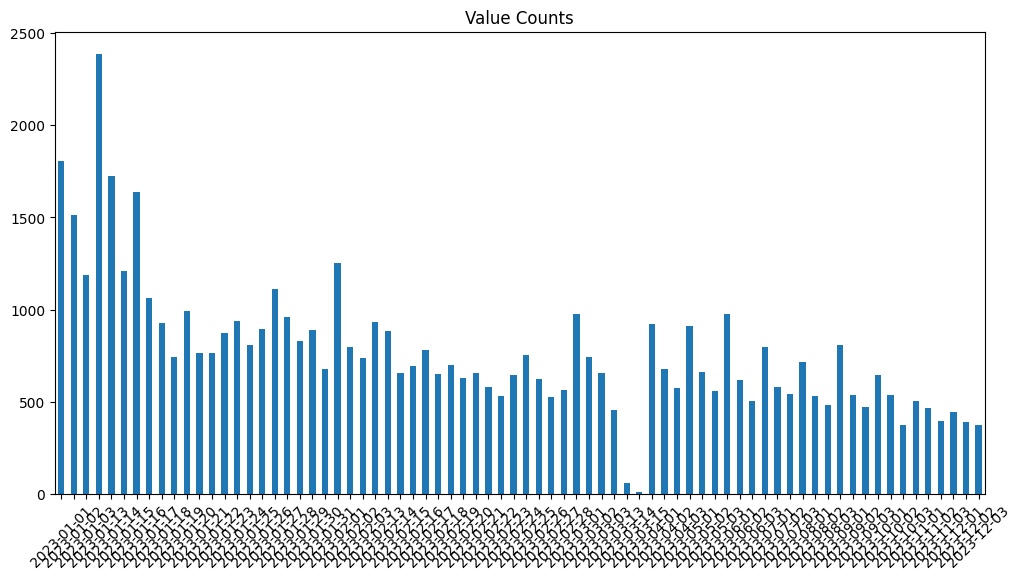

In [24]:
# 使用plot()方法绘制条形图，并设置图片大小
min_pay.plot(kind='bar', figsize=(12, 6))

# 调整横坐标长度
plt.xticks(rotation=45)

# 添加图表标题和轴标签
plt.title('Value Counts')

In [25]:
first_pay = pd.read_csv("pay_first_day_data.csv")

In [26]:
first_pay

,drama_id,user_id,max,min
0,9059,292616,2023-01-18,2023-01-17
1,9059,443054,2023-01-20,2023-01-20
2,9059,2883235,2023-02-24,2023-02-24
3,9059,3605365,2023-05-03,2023-02-03
4,9059,3939253,2023-01-30,2023-01-30
...,...,...,...,...
57137,60366,23102659,2023-02-21,2023-02-21
57138,60366,23523561,2023-05-03,2023-02-19
57139,60366,23914281,2023-11-03,2023-10-03
57140,60366,23980609,2023-05-03,2023-02-26


In [27]:
drama_min_pay_map = {}
for idx ,row in first_pay.iterrows():
    drama_min_pay_map[str(row["drama_id"]) + "-" + str(row["user_id"])] = row['min']

In [28]:
drama_min_pay_map

{'9059-292616': '2023-01-17',
 '9059-443054': '2023-01-20',
 '9059-2883235': '2023-02-24',
 '9059-3605365': '2023-02-03',
 '9059-3939253': '2023-01-30',
 '9059-4266052': '2023-03-03',
 '9059-4519570': '2023-06-01',
 '9059-5206166': '2023-02-21',
 '9059-6958474': '2023-01-16',
 '9059-11434302': '2023-02-15',
 '9059-14441280': '2023-01-30',
 '9059-15229918': '2023-02-25',
 '9059-16237180': '2023-04-01',
 '9059-16778491': '2023-02-15',
 '9059-16926982': '2023-10-01',
 '9059-19572981': '2023-09-01',
 '9059-22438091': '2023-09-02',
 '9059-22442213': '2023-09-02',
 '9059-23914281': '2023-01-14',
 '9888-2930748': '2023-09-01',
 '9888-3008150': '2023-01-13',
 '9888-3069735': '2023-08-02',
 '9888-3202126': '2023-02-28',
 '9888-3273896': '2023-10-03',
 '9888-3325018': '2023-01-16',
 '9888-3583683': '2023-02-03',
 '9888-3687199': '2023-02-13',
 '9888-3749634': '2023-06-03',
 '9888-3769588': '2023-02-21',
 '9888-4035042': '2023-02-03',
 '9888-4075375': '2023-01-23',
 '9888-4126022': '2023-02-01',


In [29]:
# 使用apply方法添加新列，将A和B列的值相加
def add_columns(row):
    key = str(row["drama_id"]) + "-" + str(row["user_id"])
    if key not in drama_min_pay_map.keys():
        return None
    return drama_min_pay_map[key]

DL_dataset['first_pay'] = DL_dataset.apply(add_columns, axis=1)

In [30]:
pay_first_dl_count = DL_dataset['first_pay'].value_counts().sort_index()

In [31]:
pay_first_dl_count.to_csv("dl_first_pay.csv")

In [32]:
sum(pay_first_dl_count)

10395

In [33]:
pay_first_dl_count

2023-01-01     400
2023-01-02     512
2023-01-03     293
2023-01-13    1057
2023-01-14     478
              ... 
2023-11-02      14
2023-11-03      19
2023-12-01      52
2023-12-02      17
2023-12-03      14
Name: first_pay, Length: 73, dtype: int64

In [35]:
DL_dataset["pay_FS"] = 0
DL_dataset["pay_DL"] = 0

In [41]:
DL_dataset["first_pay"]

0              None
1        2023-02-28
2              None
3        2023-02-28
4        2023-01-03
            ...    
21907          None
21908          None
21909          None
21910    2023-07-01
21911          None
Name: first_pay, Length: 21912, dtype: object

In [46]:
for idx, row in DL_dataset.iterrows():
    first_pay = pd.to_datetime(row['first_pay'])
    if first_pay is None:
        continue
    if pd.to_datetime("2023-01-26") <= first_pay <= pd.to_datetime("2023-02-15"):
        DL_dataset.at[idx,"pay_DL"] = 1
    if pd.to_datetime("2023-01-01") <= first_pay <= pd.to_datetime("2023-01-25"):
        DL_dataset.at[idx,"pay_FS"] = 1

In [47]:
DL_dataset["pay_DL"].value_counts()

0    19889
1     2023
Name: pay_DL, dtype: int64

In [55]:
DL_dataset["pay_FS"].value_counts()


0    16214
1     5698
Name: pay_FS, dtype: int64

In [53]:
for idx, row in DL_dataset.iterrows():
    first_pay = pd.to_datetime(row['first_pay'])
    if first_pay is None:
        continue
    if row['pay_FS'] == 0 and row['pay_DL'] == 0:     
        if first_pay <= pd.to_datetime("2023-03-31"):
            DL_dataset.at[idx,"pay_Random"] = int(1)

In [60]:
DL_dataset["pay_Random"] = DL_dataset["pay_Random"].fillna(0).astype("int64")

DL_dataset["pay_Random"].value_counts()

0    21039
1      873
Name: pay_Random, dtype: int64

In [62]:
DL_dataset

,user_id,sound_id_id,drama_id,user_name_len,user_name_has_chinese,user_name_has_english,user_intro_len,user_intro_has_chinese,user_intro_has_english,user_icon_is_default,...,k_2_8s_sim_q_2_num,k_2_8s_sim_q_3_num,k_2_15s_sim_q_1_num,k_2_15s_sim_q_2_num,k_2_15s_sim_q_3_num,user_in_drama_is_pay_for_drama_in_next_time,pay_FS,pay_DL,first_pay,pay_Random
0,12304,7017722,52265,18,0,0,NaN,0,0,0,...,0.468008,0.652918,0.279280,0.461234,0.461234,2,0,0,None,0
1,24488,6976696,59699,25,0,0,60.0,1,0,0,...,0.417907,0.583569,0.254123,0.420560,0.420560,2,0,0,2023-02-28,1
2,24488,6991707,59328,25,0,0,60.0,1,0,0,...,0.412480,0.576218,0.252045,0.416657,0.416657,2,0,0,None,0
3,24488,7018734,59699,25,0,0,60.0,1,0,0,...,0.284708,0.398228,0.208059,0.345994,0.345994,2,0,0,2023-02-28,1
4,24488,7059430,60282,25,0,0,60.0,1,0,0,...,0.429238,0.600477,0.261848,0.435509,0.435509,2,1,0,2023-01-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21907,24657259,6928876,59699,10,1,1,42.0,1,0,0,...,0.453436,0.613446,0.302645,0.461666,0.461666,2,0,0,None,0
21908,24705415,1829983,25944,9,0,0,45.0,1,0,0,...,0.430462,0.591885,0.272810,0.432745,0.432745,2,0,0,None,0
21909,24705415,2137286,25944,9,0,0,45.0,1,0,0,...,0.472406,0.626786,0.319628,0.474172,0.474172,2,0,0,None,0
21910,24705415,2866661,30383,9,0,0,45.0,1,0,0,...,0.423084,0.582927,0.270805,0.430295,0.430295,1,0,0,2023-07-01,0


In [61]:
DL_dataset.to_csv("0101_0131_all_feature_new.csv",index=None)

In [63]:
DL_FS = DL_dataset[DL_dataset['pay_FS'] == 1]
DL_DL = DL_dataset[DL_dataset['pay_DL'] == 1]

In [68]:
DL_Neg = DL_dataset[(DL_dataset['pay_FS'] == 0) & (DL_dataset['pay_DL'] == 0)]

In [69]:
DL_Neg.shape

(14191, 668)

In [74]:
DL_FS = pd.concat([DL_FS, DL_Neg.iloc[0:len(DL_Neg)//2]])

In [75]:
DL_FS.shape

(12793, 668)

In [76]:
DL_DL = pd.concat([DL_DL, DL_Neg.iloc[len(DL_Neg)//2:]])


In [77]:
DL_DL.shape

(9119, 668)

In [78]:
DL_FS.to_csv("0101_0131_all_feature_FS.csv",index=None)
DL_DL.to_csv("0101_0131_all_feature_DL.csv",index=None)